In [1]:
# Welcome to the HDMM_NN Tutorial! For an overview of what HDDM is about, as well as installation instructions, 
# visit the github page of this tutorial.

In [1]:
# Module imports
import hddm
import sys
import pandas as pd
import numpy as np
import sys
import pickle
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append('simulators')
import cddm_data_simulation as cds
import boundary_functions as bf

from helper_functions import simulator
from helper_functions import model_plot
from helper_functions import caterpillar_plot
from helper_functions import hddm_preprocess_hierarchical
from helper_functions import simulator_condition_effects
# posterior predictive plot
# caterpillar plot

from helper_functions import hddm_preprocess

/Users/afengler/opt/miniconda3/envs/hddmnn_tutorial/lib/python3.7/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# Section 1: A look into DDM variations

In [3]:
# Let's simulate some data from the angle model and check the resulting (choice, reaction) time data.
# You can change the number of samples (n_samples), and the parameters of the model (v, a, w, ndt, theta). 
# If you are outside of the valid range for any parameter you will be warned.

In [4]:
simulator_condition_effects(n_conditions = 4, 
                            n_samples_by_condition = 1000,
                            condition_effect_on_param = ['v'], 
                            model = 'angle',
                            )

[[0.60551246 1.00277795 0.52220018 0.3262548  0.29551217 0.60551246
  1.00277795 0.52220018 0.3262548  0.29551217 0.60551246 1.00277795
  0.52220018 0.3262548  0.29551217 0.60551246 1.00277795 0.52220018
  0.3262548  0.29551217 0.60551246 1.00277795 0.52220018 0.3262548
  0.29551217]
 [0.60551246 1.00277795 0.52220018 0.3262548  0.29551217 0.60551246
  1.00277795 0.52220018 0.3262548  0.29551217 0.60551246 1.00277795
  0.52220018 0.3262548  0.29551217 0.60551246 1.00277795 0.52220018
  0.3262548  0.29551217 0.60551246 1.00277795 0.52220018 0.3262548
  0.29551217]
 [0.60551246 1.00277795 0.52220018 0.3262548  0.29551217 0.60551246
  1.00277795 0.52220018 0.3262548  0.29551217 0.60551246 1.00277795
  0.52220018 0.3262548  0.29551217 0.60551246 1.00277795 0.52220018
  0.3262548  0.29551217 0.60551246 1.00277795 0.52220018 0.3262548
  0.29551217]
 [0.60551246 1.00277795 0.52220018 0.3262548  0.29551217 0.60551246
  1.00277795 0.52220018 0.3262548  0.29551217 0.60551246 1.00277795
  0.52220

(           rt  response  nn_response  condition
 0    1.055249       0.0           -1          0
 1    0.911251       0.0           -1          0
 2    0.793252       0.0           -1          0
 3    0.627254       0.0           -1          0
 4    0.613255       0.0           -1          0
 ..        ...       ...          ...        ...
 995  0.791252       0.0           -1          3
 996  0.497255       0.0           -1          3
 997  1.183247       0.0           -1          3
 998  0.565255       0.0           -1          3
 999  1.017249       0.0           -1          3
 
 [4000 rows x 4 columns],
 array([[-1.62210477,  1.00277795,  0.52220018,  0.3262548 ,  0.29551217,
          0.60551246,  1.00277795,  0.52220018,  0.3262548 ,  0.29551217,
          0.60551246,  1.00277795,  0.52220018,  0.3262548 ,  0.29551217,
          0.60551246,  1.00277795,  0.52220018,  0.3262548 ,  0.29551217,
          0.60551246,  1.00277795,  0.52220018,  0.3262548 ,  0.29551217],
        [-1.2

In [4]:
hddm_preprocess_hierarchical(model = 'angle')

(      response        rt  subj_idx  nn_response
 0          0.0  2.202141       0.0         -1.0
 1          1.0  1.756146       0.0          1.0
 2          0.0  1.698147       0.0         -1.0
 3          0.0  2.064142       0.0         -1.0
 4          0.0  1.943144       0.0         -1.0
 ...        ...       ...       ...          ...
 4995       0.0  2.491104       4.0         -1.0
 4996       1.0  2.261105       4.0          1.0
 4997       1.0  1.878110       4.0          1.0
 4998       0.0  2.188106       4.0         -1.0
 4999       0.0  2.316104       4.0         -1.0
 
 [5000 rows x 4 columns],
           v         a         z         t     theta
 0 -1.318299  1.570190  0.610825  1.438147  0.926974
 1 -1.330776  1.635546  0.608748  1.468413  0.924265
 2 -1.320850  1.531458  0.607654  1.557672  0.905594
 3 -1.312905  1.525236  0.609006  1.506820  0.942146
 4 -1.329437  1.553136  0.606771  1.454112  0.921670,
           v        a         z         t     theta
 0  0.006517 

In [5]:
data = pickle.load(open('data_storage/' + 'angle' + '_tutorial_nsubj_5_n_1000.pickle', 'rb'))

In [9]:
np.([data[0][1][0]]).shape

(1, 5)

In [ ]:
# THE SIMULATOR FUNCTION
parameter_vector = [0, 1.6, 0.5, 0.0, 0.3]
simulations = simulator(theta = parameter_vector, model = 'angle', n_samples = 1000)

In [ ]:
# Plotting the data
ground_truths = np.random.uniform(low = [-2, 0.5, 0.3, 0.0, 0.3, 0.5], high = [2, 1.5, 0.7, 2.0, 1.0, 3], size = (10, 6))

model_plot(ground_truths = ground_truths,
           cols = 2, 
           model = 'angle',
           n_plots = 10,
           max_t = 5,
           show_model = False)

In [ ]:
# ANGLE 

# MODEL PLOT:


In [ ]:
data

In [7]:
# WEIBULL_CDF

# MODEL PLOT:


In [6]:
# HDDM FIT
# Preprocess our simulator data to be ready for 
hddm_dataset = hddm_preprocess(simulations)

In [7]:
# POSTERIOR PREDICTIVE 1 SUBJECT
# We define an object of the hddm model class
hddm_model = hddm.HDDMnn_angle(hddm_dataset, informative = False, free = False,  include = 'z', is_group_model = False)

In [8]:
# Sampling:
nmcmc = 600
hddm_model.sample(nmcmc, burn = int(nmcmc / 5), dbname='traces_1.db', db = 'pickle')

 [-----------------100%-----------------] 600 of 600 complete in 48.7 sec

In [9]:
# Sampling:
hddm_model.get_traces()

,a,v,t,z_trans,theta
0,1.661191,0.079779,0.004648,-0.013874,0.335455
1,1.652059,0.030649,0.007949,-0.038218,0.325500
2,1.634221,0.032162,0.007959,0.092589,0.322679
3,1.632694,0.050735,0.009754,-0.009806,0.317312
4,1.625379,0.043678,0.012020,0.036162,0.320247
...,...,...,...,...,...
475,1.654326,0.041363,0.007666,0.020335,0.323440
476,1.658101,0.047621,0.005492,0.004085,0.340977
477,1.687779,0.032111,0.002456,0.007408,0.338485
478,1.673934,-0.009343,0.005002,0.070147,0.327111


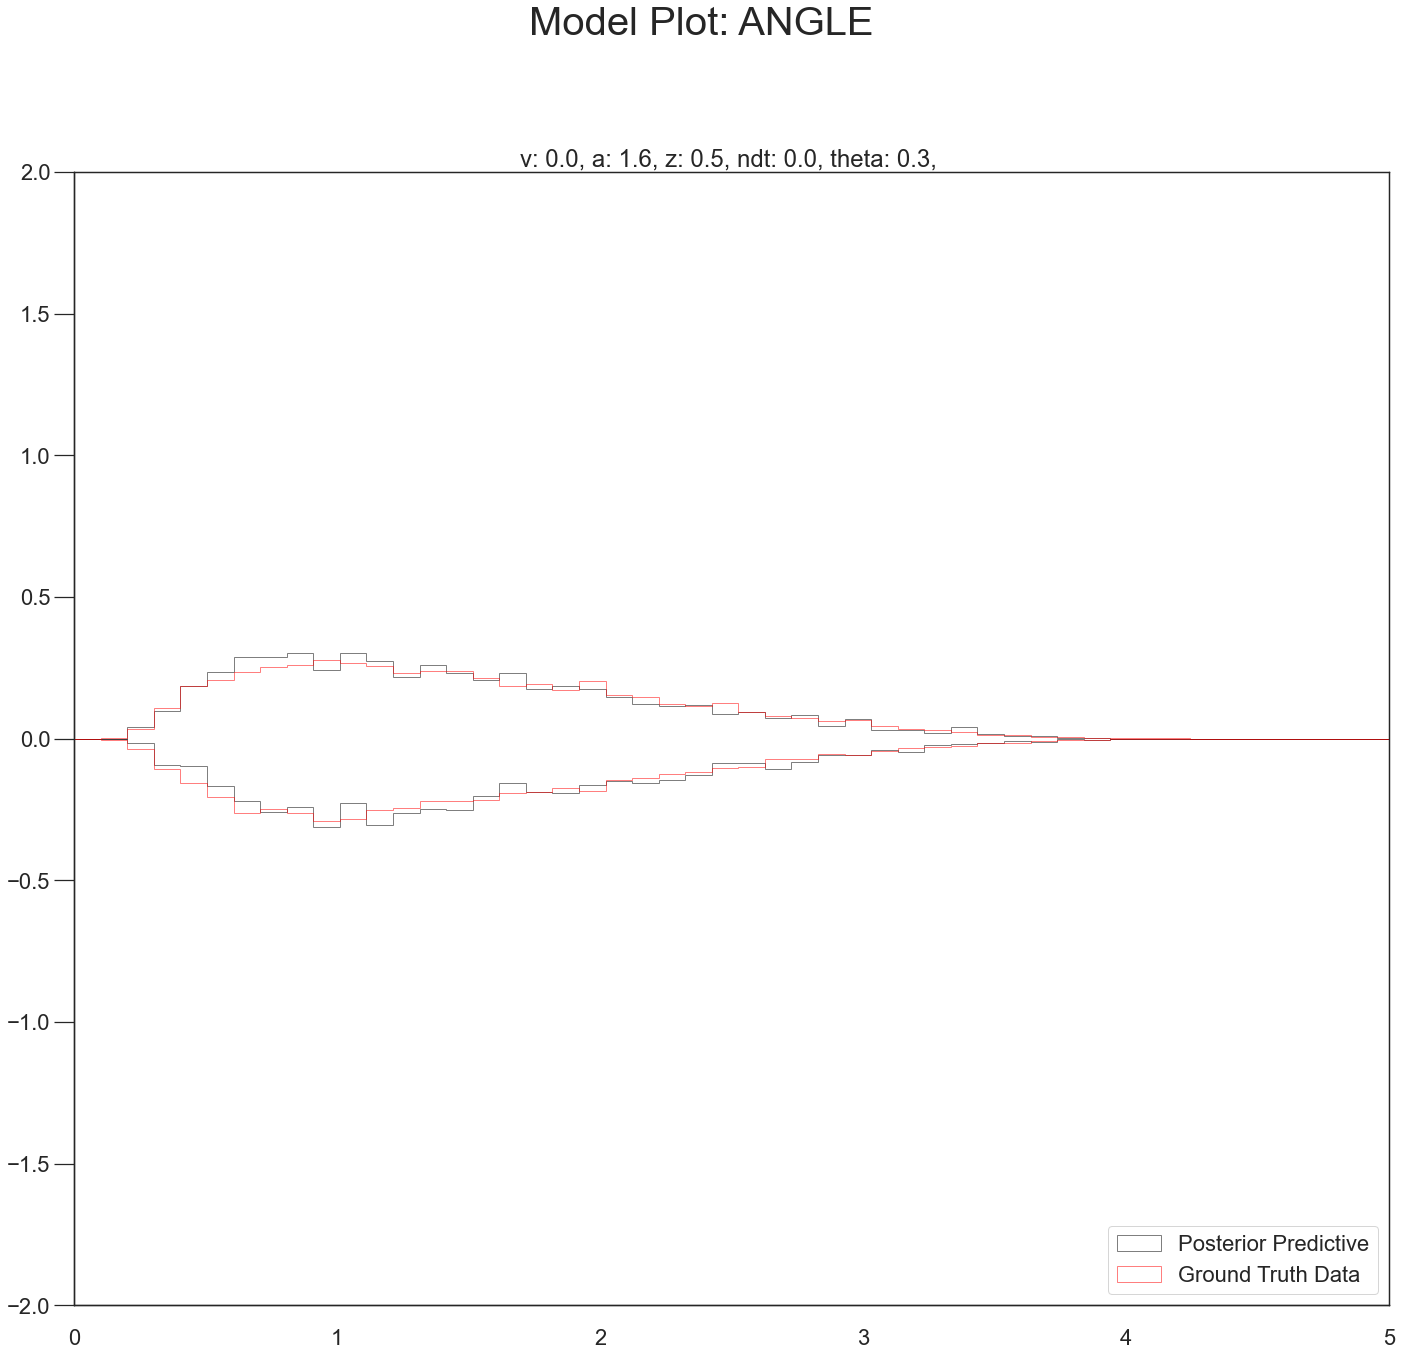

In [10]:
model_plot(posterior_samples = hddm_model.get_traces(),
           ground_truths = [0, 1.6, 0.5, 0.0, 0.3],
           model = 'angle',
           input_hddm_trace = True,
           n_post_params = 400,
           n_plots = 1,
           cols = 1,
           show_model = False)

In [5]:
caterpillar_plot(trace = hddm_model.get_traces(),
                 gt = parameter_vector)

NameError: name 'hddm_model' is not defined

In [17]:
# HIERARCHICAL DATA
(hierarchical_dataset, gt_subj, gt_global_sds , gt_global_means) = hddm_preprocess_hierarchical(model = 'angle', datasetid = 1)

In [18]:
gt_subj

,v,a,z,t,theta
0,-0.440983,1.313458,0.449723,0.858026,0.499877
1,-0.345409,1.326219,0.475996,0.799648,0.471498
2,-0.095288,1.393768,0.450178,0.723258,0.507524
3,-0.404635,1.341692,0.431621,0.821872,0.540261
4,-0.249810,1.318893,0.447823,0.893642,0.531322


In [21]:
hddm_hierarchical_model = hddm.HDDMnn_angle(hierarchical_dataset, 
                                            free = False,  
                                            informative=False, 
                                            include= 'z',
                                            is_group_model = True)

In [27]:
# Sampling:
nmcmc = 2000
hddm_hierarchical_model.sample(nmcmc,
                               burn = 1000, 
                               dbname='traces_1.db', 
                               db = 'pickle')

 [-----------------100%-----------------] 2001 of 2000 complete in 1304.1 sec

In [28]:
hddm_hierarchical_model.get_traces().mean()

a                    1.210992
a_std               35.356790
a_subj.0.0           1.393728
a_subj.1.0           1.361867
a_subj.2.0           1.488059
a_subj.3.0           1.372777
a_subj.4.0           1.340325
v                   -0.251638
v_std                8.586463
v_subj.0.0          -0.470489
v_subj.1.0          -0.340594
v_subj.2.0          -0.111720
v_subj.3.0          -0.429191
v_subj.4.0          -0.223496
t                    0.944020
t_std               34.157891
t_subj.0.0           0.831927
t_subj.1.0           0.800691
t_subj.2.0           0.706133
t_subj.3.0           0.823598
t_subj.4.0           0.897846
z_trans             -0.160650
z_std                0.128691
z_subj_trans.0.0    -0.108374
z_subj_trans.1.0    -0.075539
z_subj_trans.2.0    -0.159246
z_subj_trans.3.0    -0.254678
z_subj_trans.4.0    -0.215215
theta                0.560600
theta_std           17.976790
theta_subj.0.0       0.540892
theta_subj.1.0       0.478864
theta_subj.2.0       0.557893
theta_subj

In [103]:
param_order = {'ddm': ['v', 'a', 'z', 't'],
               'angle': ['v', 'a', 'z', 't', 'theta'],
               'weibull_cdf': ['v', 'a', 'z', 't', 'alpha', 'beta'],
              }


subj_l = []
for key in my_traces.keys():
    if '_subj' in key:
        subj_l.append(int(float(key[-3:])))
        
dat = np.zeros((max(subj_l) + 1, my_traces.shape[0], len(param_order[model])))
for key in my_traces.keys():
    if '_subj' in key:
        id_tmp = int(float(key[-3:]))
        if '_trans' in key:
            val_tmp = 1 / ( 1 + np.exp(- my_traces[key]))
        else:
            val_tmp = my_traces[key]
        dat[id_tmp, : ,param_order[model].index(key[:key.find('_')])] = val_tmp

In [98]:
gt['subj'].values

(5, 5)

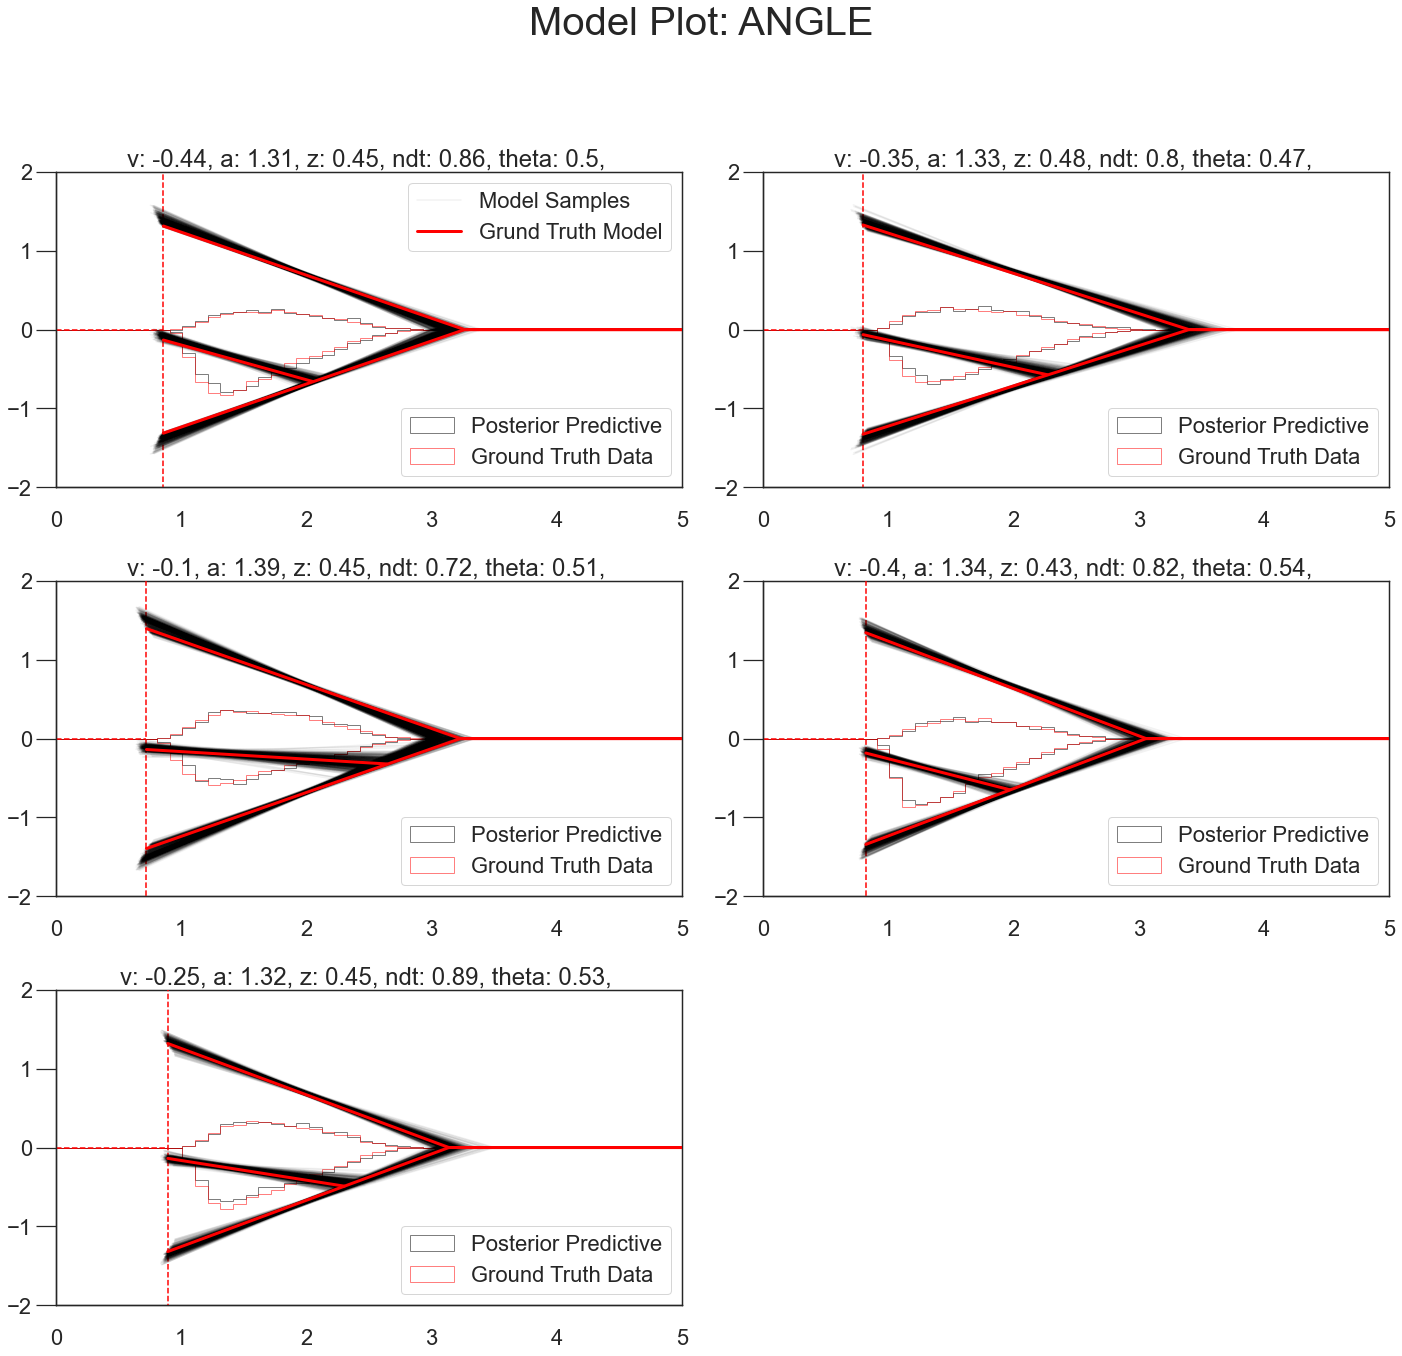

In [104]:
model_plot(ground_truths = gt['subj'].values,
           posterior_samples = dat,
           cols = 2, 
           model = 'angle',
           n_plots = 5,
           max_t = 5,
           show_model = True)

,v,a,z,t,theta
0,-0.440983,1.313458,0.449723,0.858026,0.499877
1,-0.345409,1.326219,0.475996,0.799648,0.471498
2,-0.095288,1.393768,0.450178,0.723258,0.507524
3,-0.404635,1.341692,0.431621,0.821872,0.540261
4,-0.249810,1.318893,0.447823,0.893642,0.531322


In [71]:
my_traces = hddm_hierarchical_model.get_traces()

In [37]:
gt_subj['v'][0]

-0.44098296761512756

In [42]:
params = {}
for param in gt_subj.keys():
    for i in range(gt_subj.shape[0]):
        params[param + '_subj.' + str(i) + '.0'] = gt_subj[param][i]

for param in gt_global_means.keys():
    params[param] = gt_global_means[param][0]

In [43]:
params.keys()

dict_keys(['v_subj.0.0', 'v_subj.1.0', 'v_subj.2.0', 'v_subj.3.0', 'v_subj.4.0', 'a_subj.0.0', 'a_subj.1.0', 'a_subj.2.0', 'a_subj.3.0', 'a_subj.4.0', 'z_subj.0.0', 'z_subj.1.0', 'z_subj.2.0', 'z_subj.3.0', 'z_subj.4.0', 't_subj.0.0', 't_subj.1.0', 't_subj.2.0', 't_subj.3.0', 't_subj.4.0', 'theta_subj.0.0', 'theta_subj.1.0', 'theta_subj.2.0', 'theta_subj.3.0', 'theta_subj.4.0', 'v', 'a', 'z', 't', 'theta'])

In [36]:
gt_subj.keys()

Index(['v', 'a', 'z', 't', 'theta'], dtype='object')

In [33]:
gt_global_sds

,v,a,z,t,theta
0,0.18838,0.031152,0.014843,0.034076,0.020994


In [34]:
gt_global_means

,v,a,z,t,theta
0,-0.23436,1.330553,0.441102,0.815853,0.519503


In [ ]:
def make_hierarchical_params_hddm_ready(gt_subj,
                                        gt_global_sds,
                                        gt_global_means):
    

In [29]:
hierarchical_dataset

,response,rt,subj_idx,nn_response
0,1.0,1.581020,0.0,1.0
1,1.0,1.189025,0.0,1.0
2,1.0,2.240035,0.0,1.0
3,0.0,2.078027,0.0,-1.0
4,0.0,1.655019,0.0,-1.0
...,...,...,...,...
4995,0.0,1.795634,4.0,-1.0
4996,0.0,1.600636,4.0,-1.0
4997,0.0,1.271640,4.0,-1.0
4998,0.0,1.526637,4.0,-1.0


'hellotrans'

In [56]:
def caterpillar_plot(trace = [],
                     gt = [],
                     model = 'angle',
                     hierarchical = True,
                     drop_sd = True):
    
    sns.set(style = "white", 
        palette = "muted", 
        color_codes = True,
        font_scale = 2)

    fig, ax = plt.subplots(1, 1, 
                           figsize = (10, 10), 
                           sharex = False, 
                           sharey = False)
    
    my_suptitle = fig.suptitle('Caterpillar plot: ' + model, fontsize = 40)
    sns.despine(right = True)
    
    trace = trace.copy()
    gt_dict = {}
    cnt = 0
    
    if not hierarchical:
        if model == 'ddm':
            for v in ['v', 'a', 'z', 't']:
                gt_dict[v] = gt[cnt]
                cnt += 1

        if model == 'weibull_cdf':
            for v in ['v', 'a', 'z', 't', 'alpha', 'beta']:
                gt_dict[v] = gt[cnt]
                cnt += 1

        if model == 'angle':
            for v in ['v', 'a', 'z', 't', 'theta']:
                gt_dict[v] = gt[cnt]
                cnt += 1
    else:
        gt_dict = {}
        for param in gt['subj'].keys():
            for i in range(gt_subj.shape[0]):
                gt_dict[param + '_subj.' + str(i) + '.0'] = gt['subj'][param][i]

        for param in gt['global_means'].keys():
            gt_dict[param] = gt['global_means'][param][0]
            
    ecdfs = {}
    plot_vals = {} # [0.01, 0.9], [0.01, 0.99], [mean]
    for k in trace.keys():
        if 'std' in k:
            pass
        else:
            if '_trans' in k:
                label_tmp = k.replace('_trans', '')
                trace[label_tmp] = 1 / (1 + np.exp(- trace[k]))
                k = label_tmp
                #print(trace[k].mean())
            #print(k)
            #print(trace[k])
            ok_ = 1
            if drop_sd == True:
                if 'sd' in k:
                    ok_ = 0
            if ok_:
                ecdfs[k] = ECDF(trace[k])
                tmp_sorted = sorted(trace[k])
                _p01 =  tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.01) - 1]
                _p99 = tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.99) - 1]
                _p1 = tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.1) - 1]
                _p9 = tmp_sorted[np.sum(ecdfs[k](tmp_sorted) <= 0.9) - 1]
                _pmean = trace[k].mean()
                plot_vals[k] = [[_p01, _p99], [_p1, _p9], _pmean]
        
    x = [plot_vals[k][2] for k in plot_vals.keys()]
    ax.scatter(x, plot_vals.keys(), c = 'black', marker = 's', alpha = 0)
    for k in plot_vals.keys():
        ax.plot(plot_vals[k][1], [k, k], c = 'grey', zorder = -1, linewidth = 5)
        ax.plot(plot_vals[k][0] , [k, k], c = 'black', zorder = -1)
        #print(k)
        #print(gt_dict[k])
        ax.scatter(gt_dict[k], k,  c = 'red', marker = "|")

    return plt.show()

In [55]:
hddm_hierarchical_model.get_traces()

,a,a_std,a_subj.0.0,a_subj.1.0,a_subj.2.0,a_subj.3.0,a_subj.4.0,v,v_std,v_subj.0.0,...,z_subj_trans.2.0,z_subj_trans.3.0,z_subj_trans.4.0,theta,theta_std,theta_subj.0.0,theta_subj.1.0,theta_subj.2.0,theta_subj.3.0,theta_subj.4.0
0,0.600974,3.243611,1.301297,1.360678,1.559037,1.366420,1.379998,1.037865,96.759608,-0.514959,...,-0.181322,-0.176710,-0.261946,0.539836,0.029222,0.506706,0.487594,0.580560,0.536683,0.570206
1,0.305262,90.977629,1.310898,1.379586,1.563846,1.356060,1.397003,-0.668177,53.051260,-0.514838,...,-0.178896,-0.232558,-0.254822,0.570774,0.058813,0.503240,0.484504,0.576365,0.542685,0.561137
2,1.705781,16.701482,1.309575,1.373520,1.554466,1.337933,1.406149,-0.524625,51.035862,-0.531660,...,-0.179055,-0.239759,-0.280731,0.518571,0.038683,0.515381,0.479933,0.580600,0.546267,0.578876
3,0.573488,93.565008,1.314776,1.388869,1.560920,1.354953,1.402813,-0.952540,26.793800,-0.503423,...,-0.198078,-0.281588,-0.274146,0.550303,0.049950,0.510436,0.491319,0.576830,0.549096,0.581090
4,1.607144,64.088898,1.327186,1.374506,1.555634,1.354852,1.412339,-0.828826,12.706508,-0.519885,...,-0.201222,-0.302194,-0.283761,0.536037,0.042329,0.510428,0.488274,0.586822,0.566350,0.568743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.833777,98.578101,1.311891,1.445697,1.553380,1.351759,1.413489,-0.330641,0.138449,-0.489909,...,-0.206219,-0.190522,-0.200482,1.168494,46.348032,0.496804,0.528140,0.578910,0.517120,0.568346
996,0.764770,51.579821,1.324333,1.452104,1.548038,1.330076,1.402109,-0.346099,0.196335,-0.572583,...,-0.217082,-0.183358,-0.208985,0.468084,88.103606,0.482457,0.515760,0.582143,0.522496,0.577972
997,1.819123,63.212494,1.327544,1.452185,1.556890,1.362287,1.406920,-0.398288,0.175387,-0.570336,...,-0.207040,-0.170586,-0.178765,0.040932,54.071513,0.523234,0.537304,0.586921,0.524033,0.575068
998,1.902601,51.677642,1.325901,1.445547,1.536865,1.369675,1.421309,-0.335158,0.150043,-0.464046,...,-0.216381,-0.156546,-0.192632,0.846604,73.177005,0.505840,0.501209,0.558444,0.545088,0.575067


In [57]:
gt = {}
gt['subj'] = gt_subj
gt['global_means'] = gt_global_means
gt['global_sds'] = gt_global_sds


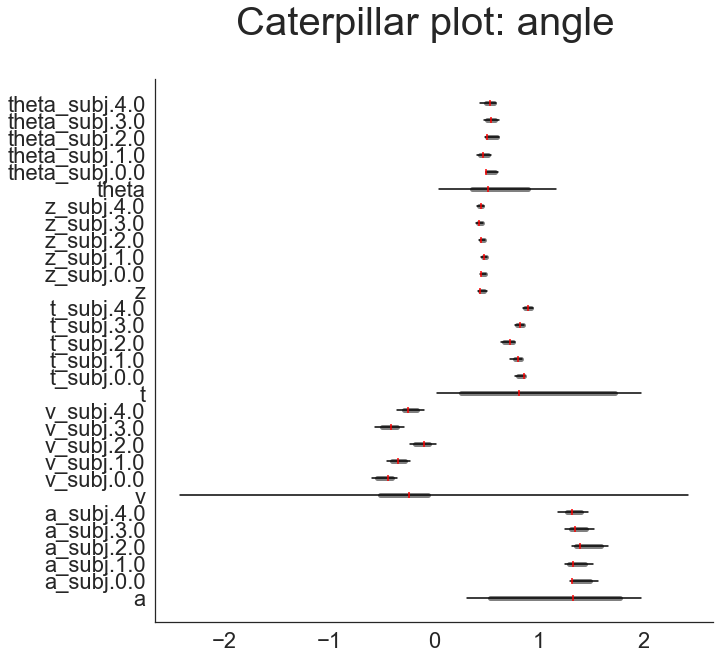

In [60]:
caterpillar_plot(trace = hddm_hierarchical_model.get_traces(),
                 gt = gt)